## Simple EDA

In [2]:
import pandas as pd

# Read CSV file containing file names and labels
labels = pd.read_csv('dataset/train.csv')

In [3]:
labels

,path,participant_id,sequence_id,sign
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie
...,...,...,...,...
94472,train_landmark_files/53618/999786174.parquet,53618,999786174,white
94473,train_landmark_files/26734/999799849.parquet,26734,999799849,have
94474,train_landmark_files/25571/999833418.parquet,25571,999833418,flower
94475,train_landmark_files/29302/999895257.parquet,29302,999895257,room


In [10]:
labels['participant_id'].nunique()

21

In [11]:
labels['participant_id'].unique()

array([26734, 28656, 16069, 25571, 62590, 32319, 37055, 29302, 49445,
       36257, 22343, 27610, 61333, 53618, 34503, 18796,  4718, 55372,
        2044, 37779, 30680])

In [12]:
labels['sign'].nunique()

250

In [16]:
word_list = labels['sign'].unique()
word_list

array(['blow', 'wait', 'cloud', 'bird', 'owie', 'duck', 'minemy', 'lips',
       'flower', 'time', 'vacuum', 'apple', 'puzzle', 'mitten', 'there',
       'dry', 'shirt', 'owl', 'yellow', 'not', 'zipper', 'clean',
       'closet', 'quiet', 'have', 'brother', 'clown', 'cheek', 'cute',
       'store', 'shoe', 'wet', 'see', 'empty', 'fall', 'balloon',
       'frenchfries', 'finger', 'same', 'cry', 'hungry', 'orange', 'milk',
       'go', 'drawer', 'TV', 'another', 'giraffe', 'wake', 'bee', 'bad',
       'can', 'say', 'callonphone', 'finish', 'old', 'backyard', 'sick',
       'look', 'that', 'black', 'yourself', 'open', 'alligator', 'moon',
       'find', 'pizza', 'shhh', 'fast', 'jacket', 'scissors', 'now',
       'man', 'sticky', 'jump', 'sleep', 'sun', 'first', 'grass', 'uncle',
       'fish', 'cowboy', 'snow', 'dryer', 'green', 'bug', 'nap', 'feet',
       'yucky', 'morning', 'sad', 'face', 'penny', 'gift', 'night',
       'hair', 'who', 'think', 'brown', 'mad', 'bed', 'drink', 'stay',


In [17]:
# Pre-defined lists of words for different categories
people_words = ['person', 'man', 'woman', 'child', 'human', 'brother', 'sister', 'uncle', 'aunt', 'grandpa', 'grandma', 'mom', 'dad', 'fireman', 'policeman', 'girl', 'boy']
object_words = ['table', 'chair', 'book', 'phone', 'pen', 'shoe', 'drawer', 'TV', 'balloon', 'pencil', 'doll', 'toy', 'horse', 'car', 'airplane', 'helicopter', 'lamp', 'room', 'bed', 'hat']
action_words = ['blow', 'wait', 'run', 'sleep', 'see', 'fall', 'cry', 'jump', 'find', 'open', 'look', 'say', 'finish', 'wake', 'dance', 'hide', 'ride', 'listen', 'talk', 'read', 'make']
body_part_words = ['lips', 'hand', 'finger', 'cheek', 'hair', 'foot', 'eye', 'face', 'nose', 'mouth', 'arm', 'leg', 'neck', 'chin', 'tooth', 'ear', 'tongue']

# Categorize words based on predefined lists
categorized_words = {'people': [], 'object': [], 'action': [], 'body_part': []}

for word in word_list:
    if word in people_words:
        categorized_words['people'].append(word)
    elif word in object_words:
        categorized_words['object'].append(word)
    elif word in action_words:
        categorized_words['action'].append(word)
    elif word in body_part_words:
        categorized_words['body_part'].append(word)

# Print the categorized words
for category, words in categorized_words.items():
    print(f"{category}: {words}")

people: ['brother', 'man', 'uncle', 'grandma', 'aunt', 'fireman', 'dad', 'child', 'grandpa', 'girl', 'mom', 'person', 'boy']
object: ['shoe', 'balloon', 'drawer', 'TV', 'bed', 'pencil', 'toy', 'doll', 'pen', 'horse', 'table', 'airplane', 'book', 'helicopter', 'lamp', 'room', 'chair', 'hat', 'car']
action: ['blow', 'wait', 'see', 'fall', 'cry', 'wake', 'say', 'finish', 'look', 'open', 'find', 'jump', 'sleep', 'listen', 'talk', 'dance', 'ride', 'make', 'read', 'hide']
body_part: ['lips', 'cheek', 'finger', 'face', 'hair', 'tooth', 'eye', 'arm', 'tongue', 'chin', 'nose', 'mouth', 'ear']


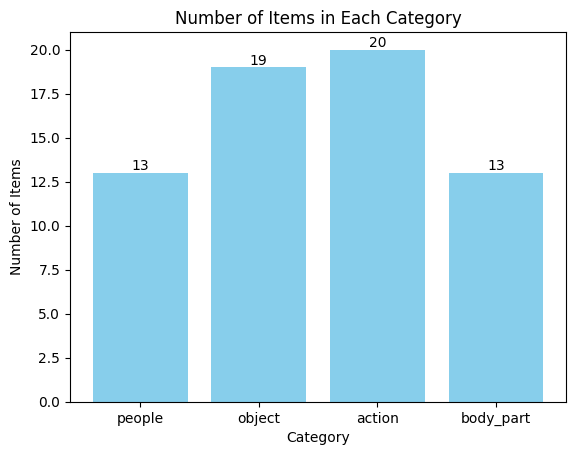

In [22]:
import matplotlib.pyplot as plt

# Number of items in each category
category_counts = {category: len(words) for category, words in categorized_words.items()}

# Plotting the bar graph
bars = plt.bar(category_counts.keys(), category_counts.values(), color='skyblue')

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Number of Items')
plt.title('Number of Items in Each Category')

# Adding counts on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom')

# Displaying the plot
plt.show()


## Loading Video

In [23]:
import pyarrow.parquet as pq

# List of file names
file_names = labels['path'].tolist()

# Load video data from parquet files
video_data = []
for file_name in file_names:
    parquet_file = pq.ParquetFile(f'Dataset/{file_name}')
    video_data.append(parquet_file.read().to_pandas())

: 

: 

In [1]:
import cv2
import numpy as np

# Resize and normalize video frames
def preprocess_video(frames):
    processed_frames = []
    for frame in frames:
        # Resize frame to desired dimensions
        resized_frame = cv2.resize(frame, (new_width, new_height))
        # Normalize frame
        normalized_frame = resized_frame / 255.0
        processed_frames.append(normalized_frame)
    return np.array(processed_frames)

# Example usage:
processed_videos = [preprocess_video(frames) for frames in video_data]

NameError: name 'video_data' is not defined

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class VideoDataset(Dataset):
    def __init__(self, videos, labels):
        self.videos = videos
        self.labels = labels

    def __len__(self):
        return len(self.videos)

    def __getitem__(self, idx):
        video = torch.tensor(self.videos[idx], dtype=torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return video, label

# Example usage:
labels = labels['label'].tolist()
video_dataset = VideoDataset(processed_videos, labels)
data_loader = DataLoader(video_dataset, batch_size=64, shuffle=True)